In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import math

## Read raw data

In [48]:
raw_path = './raw/movie_metadata.csv'
movie = pd.read_csv(raw_path)

In [49]:
movie

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [50]:
movie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

### Investigation on missing values

In [51]:
def missing_counts(thresh0,thresh1,df):
    missing_values = df.isnull().sum()
    print(f"> {thresh1}:".format())
    for column, number_of_missing_values in missing_values.items():
        if number_of_missing_values > thresh1: 
            print(f"{column}: {number_of_missing_values} missing values")
    print(f"\n> {thresh0}:".format())
    for column, number_of_missing_values in missing_values.items():
        if number_of_missing_values > thresh0 and number_of_missing_values < thresh1: 
            print(f"{column}: {number_of_missing_values} missing values")
    print(f"\n< {thresh0}:".format())
    for column, number_of_missing_values in missing_values.items():
        if number_of_missing_values < thresh0: 
            print(f"{column}: {number_of_missing_values} missing values")

missing_counts(10,50,movie)

> 50:
director_name: 104 missing values
director_facebook_likes: 104 missing values
gross: 884 missing values
plot_keywords: 153 missing values
content_rating: 303 missing values
budget: 492 missing values
title_year: 108 missing values
aspect_ratio: 329 missing values

> 10:
color: 19 missing values
duration: 15 missing values
actor_3_facebook_likes: 23 missing values
actor_2_name: 13 missing values
actor_3_name: 23 missing values
facenumber_in_poster: 13 missing values
num_user_for_reviews: 21 missing values
language: 14 missing values
actor_2_facebook_likes: 13 missing values

< 10:
actor_1_facebook_likes: 7 missing values
genres: 0 missing values
actor_1_name: 7 missing values
movie_title: 0 missing values
num_voted_users: 0 missing values
cast_total_facebook_likes: 0 missing values
movie_imdb_link: 0 missing values
country: 5 missing values
imdb_score: 0 missing values
movie_facebook_likes: 0 missing values


### filtering columns

In [52]:
columns_to_keep = [
    'movie_title', 'title_year', 'language', 'country', 'duration', 'content_rating', 'genres', 'movie_imdb_link',
    'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name',
    'imdb_score', 'num_voted_users', 'gross'
]
movie = movie[columns_to_keep]

In [53]:
movie.columns

Index(['movie_title', 'title_year', 'language', 'country', 'duration',
       'content_rating', 'genres', 'movie_imdb_link', 'director_name',
       'actor_1_name', 'actor_2_name', 'actor_3_name', 'imdb_score',
       'num_voted_users', 'gross'],
      dtype='object')

## remove missing values

In [54]:
initial_row_count = movie.shape[0]
columns_with_allowed_nans = ['actor_1_name', 'actor_2_name', 'actor_3_name', 'num_voted_users', 'gross']
movie = movie.dropna(subset=[col for col in movie.columns if col not in columns_with_allowed_nans])

# 记录删除后的行数
final_row_count = movie.shape[0]
rows_deleted = initial_row_count - final_row_count
print(f"Total rows deleted: {rows_deleted}")

Total rows deleted: 379


## Drop duplicates

In [56]:
dup = movie.loc[movie['movie_title'].duplicated(keep = False)]
grouped = dup.sort_values(by='movie_title').groupby('movie_title')
cnt = 0
for title, group in grouped:
    if cnt<=3:
        if len(group) > 1:  # 如果组内有超过一行，则存在重复的 movie_title
            cnt += 1
            print(f"{cnt} - Duplicate movie title found: {title}")
            display(group)

1 - Duplicate movie title found: 20,000 Leagues Under the Sea 


,movie_title,title_year,language,country,duration,content_rating,genres,movie_imdb_link,director_name,actor_1_name,actor_2_name,actor_3_name,imdb_score,num_voted_users,gross
3711,"20,000 Leagues Under the Sea",1954.0,English,USA,127.0,Approved,Adventure|Drama|Family|Fantasy|Sci-Fi,http://www.imdb.com/title/tt0046672/?ref_=fn_t...,Richard Fleischer,James Mason,Robert J. Wilke,Paul Lukas,7.2,22123,NaN
4894,"20,000 Leagues Under the Sea",1954.0,English,USA,127.0,Approved,Adventure|Drama|Family|Fantasy|Sci-Fi,http://www.imdb.com/title/tt0046672/?ref_=fn_t...,Richard Fleischer,James Mason,Robert J. Wilke,Paul Lukas,7.2,22124,NaN


2 - Duplicate movie title found: A Nightmare on Elm Street 


,movie_title,title_year,language,country,duration,content_rating,genres,movie_imdb_link,director_name,actor_1_name,actor_2_name,actor_3_name,imdb_score,num_voted_users,gross
1420,A Nightmare on Elm Street,1984.0,English,USA,101.0,X,Horror,http://www.imdb.com/title/tt0087800/?ref_=fn_t...,Wes Craven,Johnny Depp,Lin Shaye,Amanda Wyss,7.5,149285,26505000.0
4352,A Nightmare on Elm Street,1984.0,English,USA,101.0,X,Horror,http://www.imdb.com/title/tt0087800/?ref_=fn_t...,Wes Craven,Johnny Depp,Lin Shaye,Amanda Wyss,7.5,149293,26505000.0


3 - Duplicate movie title found: A Woman, a Gun and a Noodle Shop 


,movie_title,title_year,language,country,duration,content_rating,genres,movie_imdb_link,director_name,actor_1_name,actor_2_name,actor_3_name,imdb_score,num_voted_users,gross
3007,"A Woman, a Gun and a Noodle Shop",2009.0,Mandarin,China,95.0,R,Comedy|Drama,http://www.imdb.com/title/tt1428556/?ref_=fn_t...,Yimou Zhang,Honglei Sun,Ni Yan,Dahong Ni,5.7,2410,190666.0
4408,"A Woman, a Gun and a Noodle Shop",2009.0,Mandarin,China,95.0,R,Comedy|Drama,http://www.imdb.com/title/tt1428556/?ref_=fn_t...,Yimou Zhang,Honglei Sun,Ni Yan,Dahong Ni,5.7,2410,190666.0


4 - Duplicate movie title found: Across the Universe 


,movie_title,title_year,language,country,duration,content_rating,genres,movie_imdb_link,director_name,actor_1_name,actor_2_name,actor_3_name,imdb_score,num_voted_users,gross
4842,Across the Universe,2007.0,English,USA,133.0,PG-13,Drama|Fantasy|Musical|Romance,http://www.imdb.com/title/tt0445922/?ref_=fn_t...,Julie Taymor,Jim Sturgess,T.V. Carpio,Robert Clohessy,7.4,91863,24343673.0
1113,Across the Universe,2007.0,English,USA,133.0,PG-13,Drama|Fantasy|Musical|Romance,http://www.imdb.com/title/tt0445922/?ref_=fn_t...,Julie Taymor,Jim Sturgess,T.V. Carpio,Robert Clohessy,7.4,91860,24343673.0


(title, year, director same, the duplicates are exact the same)

### format

In [59]:
movie['movie_title'] = movie['movie_title'].str.replace('\xa0', '', regex=False)
movie['movie_title'] = movie['movie_title'].str.replace(r'\s', ' ', regex=True)
movie['title_year'] = movie['title_year'].astype(int)

In [60]:
initial_row_count = movie.shape[0]

movie.drop_duplicates(subset=['movie_title', 'title_year', 'director_name'], keep='first', inplace=True)     
        
final_row_count = movie.shape[0]
rows_deleted = initial_row_count - final_row_count
print(f"Total rows deleted: {rows_deleted}")

Total rows deleted: 120


In [61]:
movie.loc[movie['movie_title'].duplicated(keep = False)]

,movie_title,title_year,language,country,duration,content_rating,genres,movie_imdb_link,director_name,actor_1_name,actor_2_name,actor_3_name,imdb_score,num_voted_users,gross
1002,The Host,2013,English,USA,125.0,PG-13,Action|Adventure|Romance|Sci-Fi|Thriller,http://www.imdb.com/title/tt1517260/?ref_=fn_t...,Andrew Niccol,J.D. Evermore,Chandler Canterbury,Rachel Roberts,5.9,92461,26616999.0
2988,The Host,2006,Korean,South Korea,110.0,R,Comedy|Drama|Horror|Sci-Fi,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,7.0,68883,2201412.0


In [62]:
row_index = movie.loc[movie['movie_title'].duplicated(keep = False)].index.tolist()
for row in row_index:
    movie.loc[row,'movie_title'] = movie.loc[row,'movie_title']+'('+str(movie.loc[row,'title_year'])+')'

In [64]:
movie.loc[[1002,2988]]

,movie_title,title_year,language,country,duration,content_rating,genres,movie_imdb_link,director_name,actor_1_name,actor_2_name,actor_3_name,imdb_score,num_voted_users,gross
1002,The Host(2013),2013,English,USA,125.0,PG-13,Action|Adventure|Romance|Sci-Fi|Thriller,http://www.imdb.com/title/tt1517260/?ref_=fn_t...,Andrew Niccol,J.D. Evermore,Chandler Canterbury,Rachel Roberts,5.9,92461,26616999.0
2988,The Host(2006),2006,Korean,South Korea,110.0,R,Comedy|Drama|Horror|Sci-Fi,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,Joon-ho Bong,Doona Bae,Kang-ho Song,Ah-sung Ko,7.0,68883,2201412.0


### Process Actor to the format as genres

In [75]:
movie

,movie_title,title_year,language,country,duration,content_rating,genres,movie_imdb_link,director_name,imdb_score,num_voted_users,gross,actors
0,Avatar,2009,English,USA,178.0,PG-13,Action|Adventure|Fantasy|Sci-Fi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,James Cameron,7.9,886204,760505847.0,CCH Pounder|Joel David Moore|Wes Studi
1,Pirates of the Caribbean: At World's End,2007,English,USA,169.0,PG-13,Action|Adventure|Fantasy,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,Gore Verbinski,7.1,471220,309404152.0,Johnny Depp|Orlando Bloom|Jack Davenport
2,Spectre,2015,English,UK,148.0,PG-13,Action|Adventure|Thriller,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,Sam Mendes,6.8,275868,200074175.0,Christoph Waltz|Rory Kinnear|Stephanie Sigman
3,The Dark Knight Rises,2012,English,USA,164.0,PG-13,Action|Thriller,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,Christopher Nolan,8.5,1144337,448130642.0,Tom Hardy|Christian Bale|Joseph Gordon-Levitt
5,John Carter,2012,English,USA,132.0,PG-13,Action|Adventure|Sci-Fi,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,Andrew Stanton,6.6,212204,73058679.0,Daryl Sabara|Samantha Morton|Polly Walker
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,El Mariachi,1992,Spanish,USA,81.0,R,Action|Crime|Drama|Romance|Thriller,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,Robert Rodriguez,6.9,52055,2040920.0,Carlos Gallardo|Peter Marquardt|Consuelo Gómez
5036,The Mongol King,2005,English,USA,84.0,PG-13,Crime|Drama,http://www.imdb.com/title/tt0430371/?ref_=fn_t...,Anthony Vallone,7.8,36,NaN,Richard Jewell|John Considine|Sara Stepnicka
5037,Newlyweds,2011,English,USA,95.0,Not Rated,Comedy|Drama,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,Edward Burns,6.4,1338,4584.0,Kerry Bishé|Caitlin FitzGerald|Daniella Pineda
5041,Shanghai Calling,2012,English,USA,100.0,PG-13,Comedy|Drama|Romance,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,Daniel Hsia,6.3,1255,10443.0,Alan Ruck|Daniel Henney|Eliza Coupe


In [74]:
movie['actor_1_name'] = movie['actor_1_name'].fillna('')
movie['actor_2_name'] = movie['actor_2_name'].fillna('')
movie['actor_3_name'] = movie['actor_3_name'].fillna('')
movie['actors'] = movie.apply(lambda row: '|'.join(filter(None, [row['actor_1_name'], row['actor_2_name'], row['actor_3_name']])), axis=1)
movie = movie.drop(['actor_1_name', 'actor_2_name', 'actor_3_name'], axis=1)
movie = movie.dropna(subset=['actors'])

### Investigation on data distribution (outlier)

In [65]:
movie.describe()

,title_year,duration,imdb_score,num_voted_users,gross
count,4544.000000,4544.000000,4544.000000,4.544000e+03,3.986000e+03
mean,2002.132042,108.591769,6.421017,8.853726e+04,4.843932e+07
std,12.340791,22.262634,1.107436,1.420543e+05,6.766625e+07
min,1927.000000,20.000000,1.600000,6.000000e+00,1.620000e+02
25%,1999.000000,94.000000,5.800000,1.127650e+04,5.714988e+06
50%,2005.000000,104.000000,6.500000,3.839850e+04,2.560790e+07
75%,2010.000000,118.000000,7.200000,1.020005e+05,6.255991e+07
max,2016.000000,330.000000,9.300000,1.689764e+06,7.605058e+08


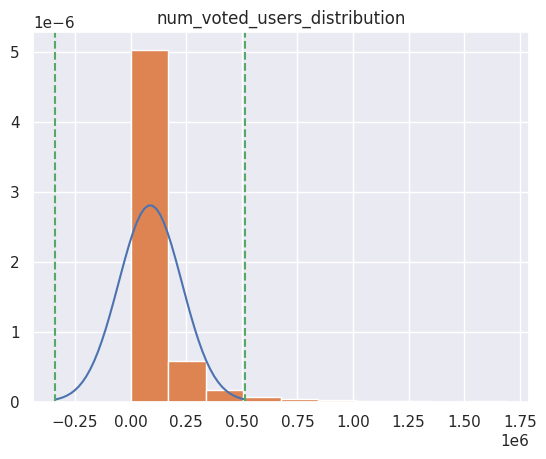

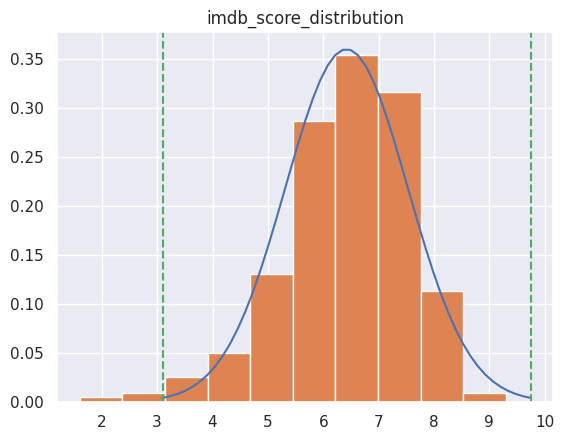

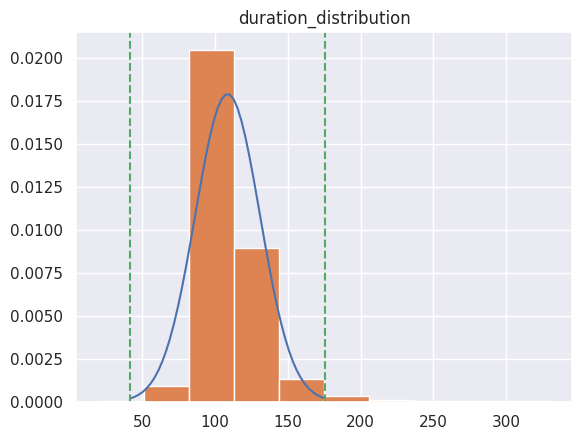

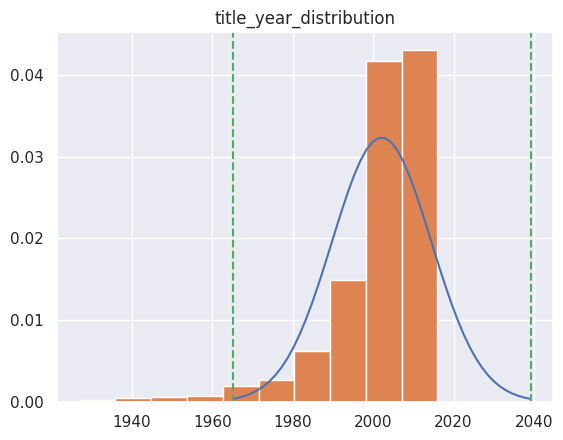

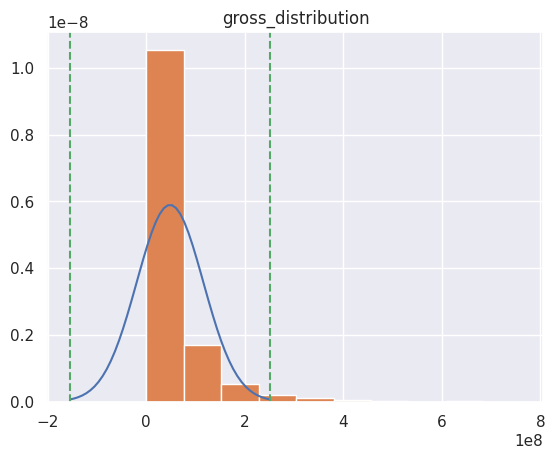

In [66]:
def plot_distribution(col,df):
    data = df[col]
    mean = data.mean()
    std = data.std()
    x = np.linspace(mean-3*std, mean+3*std)
    y = np.exp(-(x - mean) ** 2 / (2 * std ** 2)) / (math.sqrt(2*math.pi)*std)
    sns.set()
    #y2 = np.exp(-(data - mean) ** 2 / (2 * std ** 2)) / (math.sqrt(2*math.pi)*std)
    plt.plot(x,y)
    plt.axvline(x=mean-3*std, c = 'g', ls = '--')
    plt.axvline(x=mean+3*std, c = 'g', ls = '--')
    plt.hist(data, density=True)
    plt.title(col + '_distribution')
    plt.show()
    
numeric_columns = ['num_voted_users', 'imdb_score', 'duration', 'title_year', 'gross']
for column in numeric_columns:
    plot_distribution(column, movie)

### Outlier detection on 'gross'

In [67]:
col = 'gross'

df = movie.copy()
initial_row_count = df.shape[0]
z_score = preprocessing.scale(df[col].tolist())
z_df= pd.DataFrame(df[col])
z_df['z_score'] = z_score
z_df.loc[z_df['z_score']<-2,col] = np.NaN
z_df.loc[z_df['z_score']>2,col] = np.NaN
df[col] = z_df[col]
df.dropna() 
final_row_count = df.shape[0]
rows_deleted = initial_row_count - final_row_count
print(f"Total rows deleted: {rows_deleted}")

Total rows deleted: 0


In [68]:
movie

,movie_title,title_year,language,country,duration,content_rating,genres,movie_imdb_link,director_name,actor_1_name,actor_2_name,actor_3_name,imdb_score,num_voted_users,gross
0,Avatar,2009,English,USA,178.0,PG-13,Action|Adventure|Fantasy|Sci-Fi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,7.9,886204,760505847.0
1,Pirates of the Caribbean: At World's End,2007,English,USA,169.0,PG-13,Action|Adventure|Fantasy,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,7.1,471220,309404152.0
2,Spectre,2015,English,UK,148.0,PG-13,Action|Adventure|Thriller,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,6.8,275868,200074175.0
3,The Dark Knight Rises,2012,English,USA,164.0,PG-13,Action|Thriller,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,8.5,1144337,448130642.0
5,John Carter,2012,English,USA,132.0,PG-13,Action|Adventure|Sci-Fi,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,6.6,212204,73058679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,El Mariachi,1992,Spanish,USA,81.0,R,Action|Crime|Drama|Romance|Thriller,http://www.imdb.com/title/tt0104815/?ref_=fn_t...,Robert Rodriguez,Carlos Gallardo,Peter Marquardt,Consuelo Gómez,6.9,52055,2040920.0
5036,The Mongol King,2005,English,USA,84.0,PG-13,Crime|Drama,http://www.imdb.com/title/tt0430371/?ref_=fn_t...,Anthony Vallone,Richard Jewell,John Considine,Sara Stepnicka,7.8,36,NaN
5037,Newlyweds,2011,English,USA,95.0,Not Rated,Comedy|Drama,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,Edward Burns,Kerry Bishé,Caitlin FitzGerald,Daniella Pineda,6.4,1338,4584.0
5041,Shanghai Calling,2012,English,USA,100.0,PG-13,Comedy|Drama|Romance,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,6.3,1255,10443.0


### export

In [83]:
def is_float(element):
    try:
        float(element)  # 尝试将元素转换为浮点数
        return True
    except ValueError:
        return False

# 使用 apply 方法和 is_float 函数找出包含浮点数的行
float_indices = movie['actors'].apply(is_float)

In [84]:
movie[float_indices]

,movie_title,title_year,language,country,duration,content_rating,genres,movie_imdb_link,director_name,imdb_score,num_voted_users,gross,actors


In [86]:
output_file = 'validated/movie_data_validated_0.csv'
movie.to_csv(output_file, index=False)